<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/%EB%8B%B9%EB%87%A8%EB%B3%91%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9Dby%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

당뇨병 데이터를 가지고 로지스틱회기로 당뇨병인지 아닌지 확인
후에 데이터를 입력후그거에 맞춰서 당뇨병인지 아닌지 확인해보기

<데이터셋 출처><br>
<br>
https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis/data

In [1]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# csv 파일 읽기
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/응용/diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2>csv파일 컬럼의미 확인</h2>
Pregnancies : 임신<br>
Glucose : 포도당<br>
BloodPressure : 혈압<br>
SkinThickness : 피부두께<br>
Insulin : 인슐린<br>
BMI : BMI<br>
DiabetesPedigreeFunction : 당뇨병혈통기능<br>
Age : 나이<br>
Outcome : 당뇨병 여부 0(X) or 1(O) <br><br>


In [3]:
# 데이터 확인
data.shape

(768, 9)

In [4]:
data.info()
# null 값은 없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# nan 값 확인
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Outcome 컬럼 데이터 확인.
# 0, 1 아닌 데이터 확인하기위해
data['Outcome'].unique()

array([1, 0])

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


당뇨병<br>
인슐린 분비량 낮음 <br>
포도당 (200이상) <br>
혈압 높음(126이상 일시)<br>
<br><br>
혈당이 높아지면 인슐린이 분비 -> 잘이루어지 않으면 당뇨


In [8]:
# 당뇨병 확인을 위한 필요한 데이터 데이터프레임만들기
dataset = data[['Glucose', 'BloodPressure', 'Insulin', 'Age', 'Outcome']]

In [9]:
dataset.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,148,72,0,50,1
1,85,66,0,31,0
2,183,64,0,32,1
3,89,66,94,21,0
4,137,40,168,33,1


In [10]:
# target 데이터 추출
person_target = dataset['Outcome'].to_numpy()
person_target[:5]

array([1, 0, 1, 0, 1])

In [11]:
# input 데이터 추출
person_input = dataset[['Glucose', 'BloodPressure','Insulin', 'Age']].to_numpy()
person_input[:5]

array([[148,  72,   0,  50],
       [ 85,  66,   0,  31],
       [183,  64,   0,  32],
       [ 89,  66,  94,  21],
       [137,  40, 168,  33]])

In [12]:
# train, test 데이터 분리하기 75%, 25%
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(person_input, person_target, random_state=42)

In [13]:
train_input.shape

(576, 4)

In [14]:
test_input.shape

(192, 4)

In [15]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_before = ss.transform(train_input)
test_before = ss.transform(test_input)

In [16]:
# 최근접 이웃 분류기 확률예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_before, train_target)

print('train score : ', kn.score(train_before, train_target), '\ntest score : ', kn.score(test_before, test_target))

train score :  0.8472222222222222 
test score :  0.7395833333333334


In [17]:
# 위 결과를 확인하면 훈련이 재대로안되어있다.

In [18]:
# 최적의 이웃점의 개수 확인
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
for _ in range(1,10):
  kn = KNeighborsClassifier(n_neighbors=_)
  kn.fit(train_before, train_target)

  train_score.append(kn.score(train_before, train_target))
  test_score.append(kn.score(test_before, test_target))
# print('train score : ', kn.score(train_before, train_target), '\ntest score : ', kn.score(test_before, test_target))

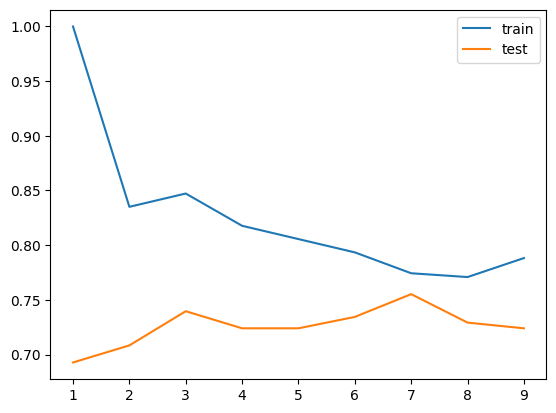

In [19]:
# 이웃점 개수에 따른 평가율
import matplotlib.pyplot as plt

plt.plot(range(1,10), train_score, label='train')
plt.plot(range(1,10), test_score, label='test')

plt.legend()
plt.show()

최적의 이웃점은 7이다.
<br>하지만 학습률은 낮게 나온다...

In [20]:
# 테스트 데이터 첫 5개 확인
kn.predict(test_before[:5])

array([0, 0, 0, 1, 1])

In [21]:
# predict_proba() => 열의 확률
proba = kn.predict_proba(test_before[:5])   # test데이터 기준으로 처음 5개확인
print(proba)

[[0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.88888889 0.11111111]
 [0.44444444 0.55555556]
 [0.44444444 0.55555556]]


현재까지 사용했던 방법은 k-최근접이웃을 이용해서 당뇨병인지 아닌지 확인을 했다.<br>밑에서는 로지스틱 회귀 방법으로 확률을 알아보기

In [22]:
# 로지스틱회귀 모델 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_before, train_target)

LogisticRegression()

In [25]:
# predict_proba() 데이터 확인전 train_target 형태 확인
train_target[:5]

array([1, 0, 0, 0, 0])

In [23]:
# 학습 데이터 처음부터 5개까지 확인해보기
lr.predict_proba(train_before[:5])

array([[0.4635764 , 0.5364236 ],
       [0.72964395, 0.27035605],
       [0.92741645, 0.07258355],
       [0.92855604, 0.07144396],
       [0.87058479, 0.12941521]])

In [26]:
# 어떤게 양성인지 확인하기 - 현재는 0, 1이지만 다른데이터로 할때는 알파벳 순서로 나열됨
lr.classes_

array([0, 1])

In [21]:
# input 데이터 추출
person_input = dataset[['Glucose', 'BloodPressure','Insulin', 'Age']].to_numpy()
person_input[:5]

<h2>데이터 예측해보기!!!! </h2>

포도당 200, 혈압 80, 인슐린 0, 나이는 26
결과확인!!

In [28]:
lr.predict([[200, 80, 0, 26]])

array([1])

In [48]:
glu, blood, insulin, age = map(int, input('포도당, 혈압, 인슐린, 나이 순으로 입력해주세요').split())

포도당, 혈압, 인슐린, 나이 순으로 입력해주세요200 80 0 26


In [49]:
glu

200

In [50]:
blood

80

In [51]:
insulin

0

In [52]:
age

26

In [53]:
# numpy 형태로 바꾸기
insert_data = [glu, blood, insulin, age]

In [55]:
re = lr.predict([[glu, blood, insulin, age]])

if re ==  1:
  print('당뇨입니다.')
else :
  print('당뇨아닙니다.')

당뇨입니다.


사용자가 입력받은 결과로 당뇨인지 아닌지 확인가능한 모델을 만들었다.